<a href="https://colab.research.google.com/github/harshavardhangadila/Training-Neural-networks-with-Keras/blob/main/Part%201/E_Comparing_different_Weight_Initializations_in_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
import matplotlib.pyplot as plt
import numpy as np

# Set random seed
tf.random.set_seed(42)


In [2]:
# Load Fashion-MNIST
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize to [0, 1]
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand dimensions
x_train_full = np.expand_dims(x_train_full, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Subset: 4500 train, 500 validation
x_train, y_train = x_train_full[:4500], y_train_full[:4500]
x_val, y_val = x_train_full[4500:5000], y_train_full[4500:5000]

print("Training samples:", x_train.shape)
print("Validation samples:", x_val.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (4500, 28, 28, 1)
Validation samples: (500, 28, 28, 1)


In [3]:
# Build a CNN with specified kernel initializer
def build_model(initializer="glorot_uniform"):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializer,
                      padding='same', input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer,
                      padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_initializer=initializer),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [4]:
# Define different initializers
initializers_list = {
    "glorot_uniform": "glorot_uniform",
    "he_normal": "he_normal",
    "lecun_normal": "lecun_normal",
    "random_normal_std0.05": initializers.RandomNormal(stddev=0.05)
}

# Dictionary to hold models' training histories
histories = {}

# Train each model
for name, init in initializers_list.items():
    print(f"\nTraining model with {name} initializer...")
    model = build_model(initializer=init)
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=20,
        batch_size=64,
        verbose=2
    )
    histories[name] = history



Training model with glorot_uniform initializer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
71/71 - 9s - 121ms/step - accuracy: 0.6687 - loss: 0.9395 - val_accuracy: 0.7920 - val_loss: 0.5320
Epoch 2/20
71/71 - 0s - 4ms/step - accuracy: 0.7996 - loss: 0.5469 - val_accuracy: 0.8600 - val_loss: 0.4056
Epoch 3/20
71/71 - 0s - 4ms/step - accuracy: 0.8411 - loss: 0.4518 - val_accuracy: 0.8760 - val_loss: 0.3740
Epoch 4/20
71/71 - 0s - 4ms/step - accuracy: 0.8556 - loss: 0.4012 - val_accuracy: 0.8720 - val_loss: 0.3459
Epoch 5/20
71/71 - 0s - 4ms/step - accuracy: 0.8729 - loss: 0.3635 - val_accuracy: 0.8760 - val_loss: 0.3320
Epoch 6/20
71/71 - 0s - 5ms/step - accuracy: 0.8813 - loss: 0.3358 - val_accuracy: 0.8860 - val_loss: 0.3172
Epoch 7/20
71/71 - 0s - 4ms/step - accuracy: 0.8911 - loss: 0.3121 - val_accuracy: 0.8920 - val_loss: 0.2922
Epoch 8/20
71/71 - 0s - 4ms/step - accuracy: 0.8993 - loss: 0.2893 - val_accuracy: 0.8980 - val_loss: 0.2743
Epoch 9/20
71/71 - 0s - 4ms/step - accuracy: 0.9093 - loss: 0.2633 - val_accuracy: 0.8940 - val_loss: 0.2653
Epoch 10/20
71/71

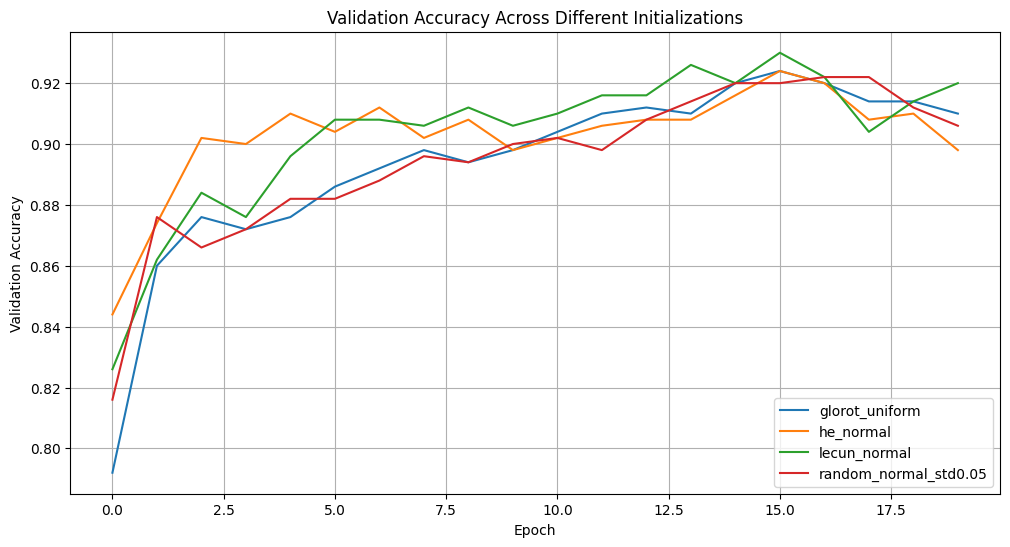

In [5]:
# Plot validation accuracy for all models
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title("Validation Accuracy Across Different Initializations")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


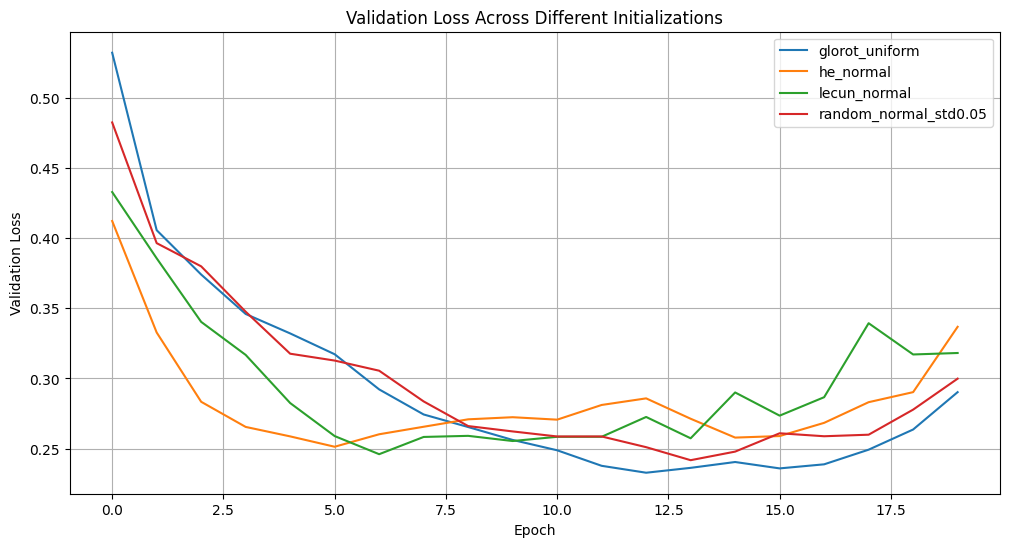

In [6]:
# Plot validation loss for all models
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)
plt.title("Validation Loss Across Different Initializations")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


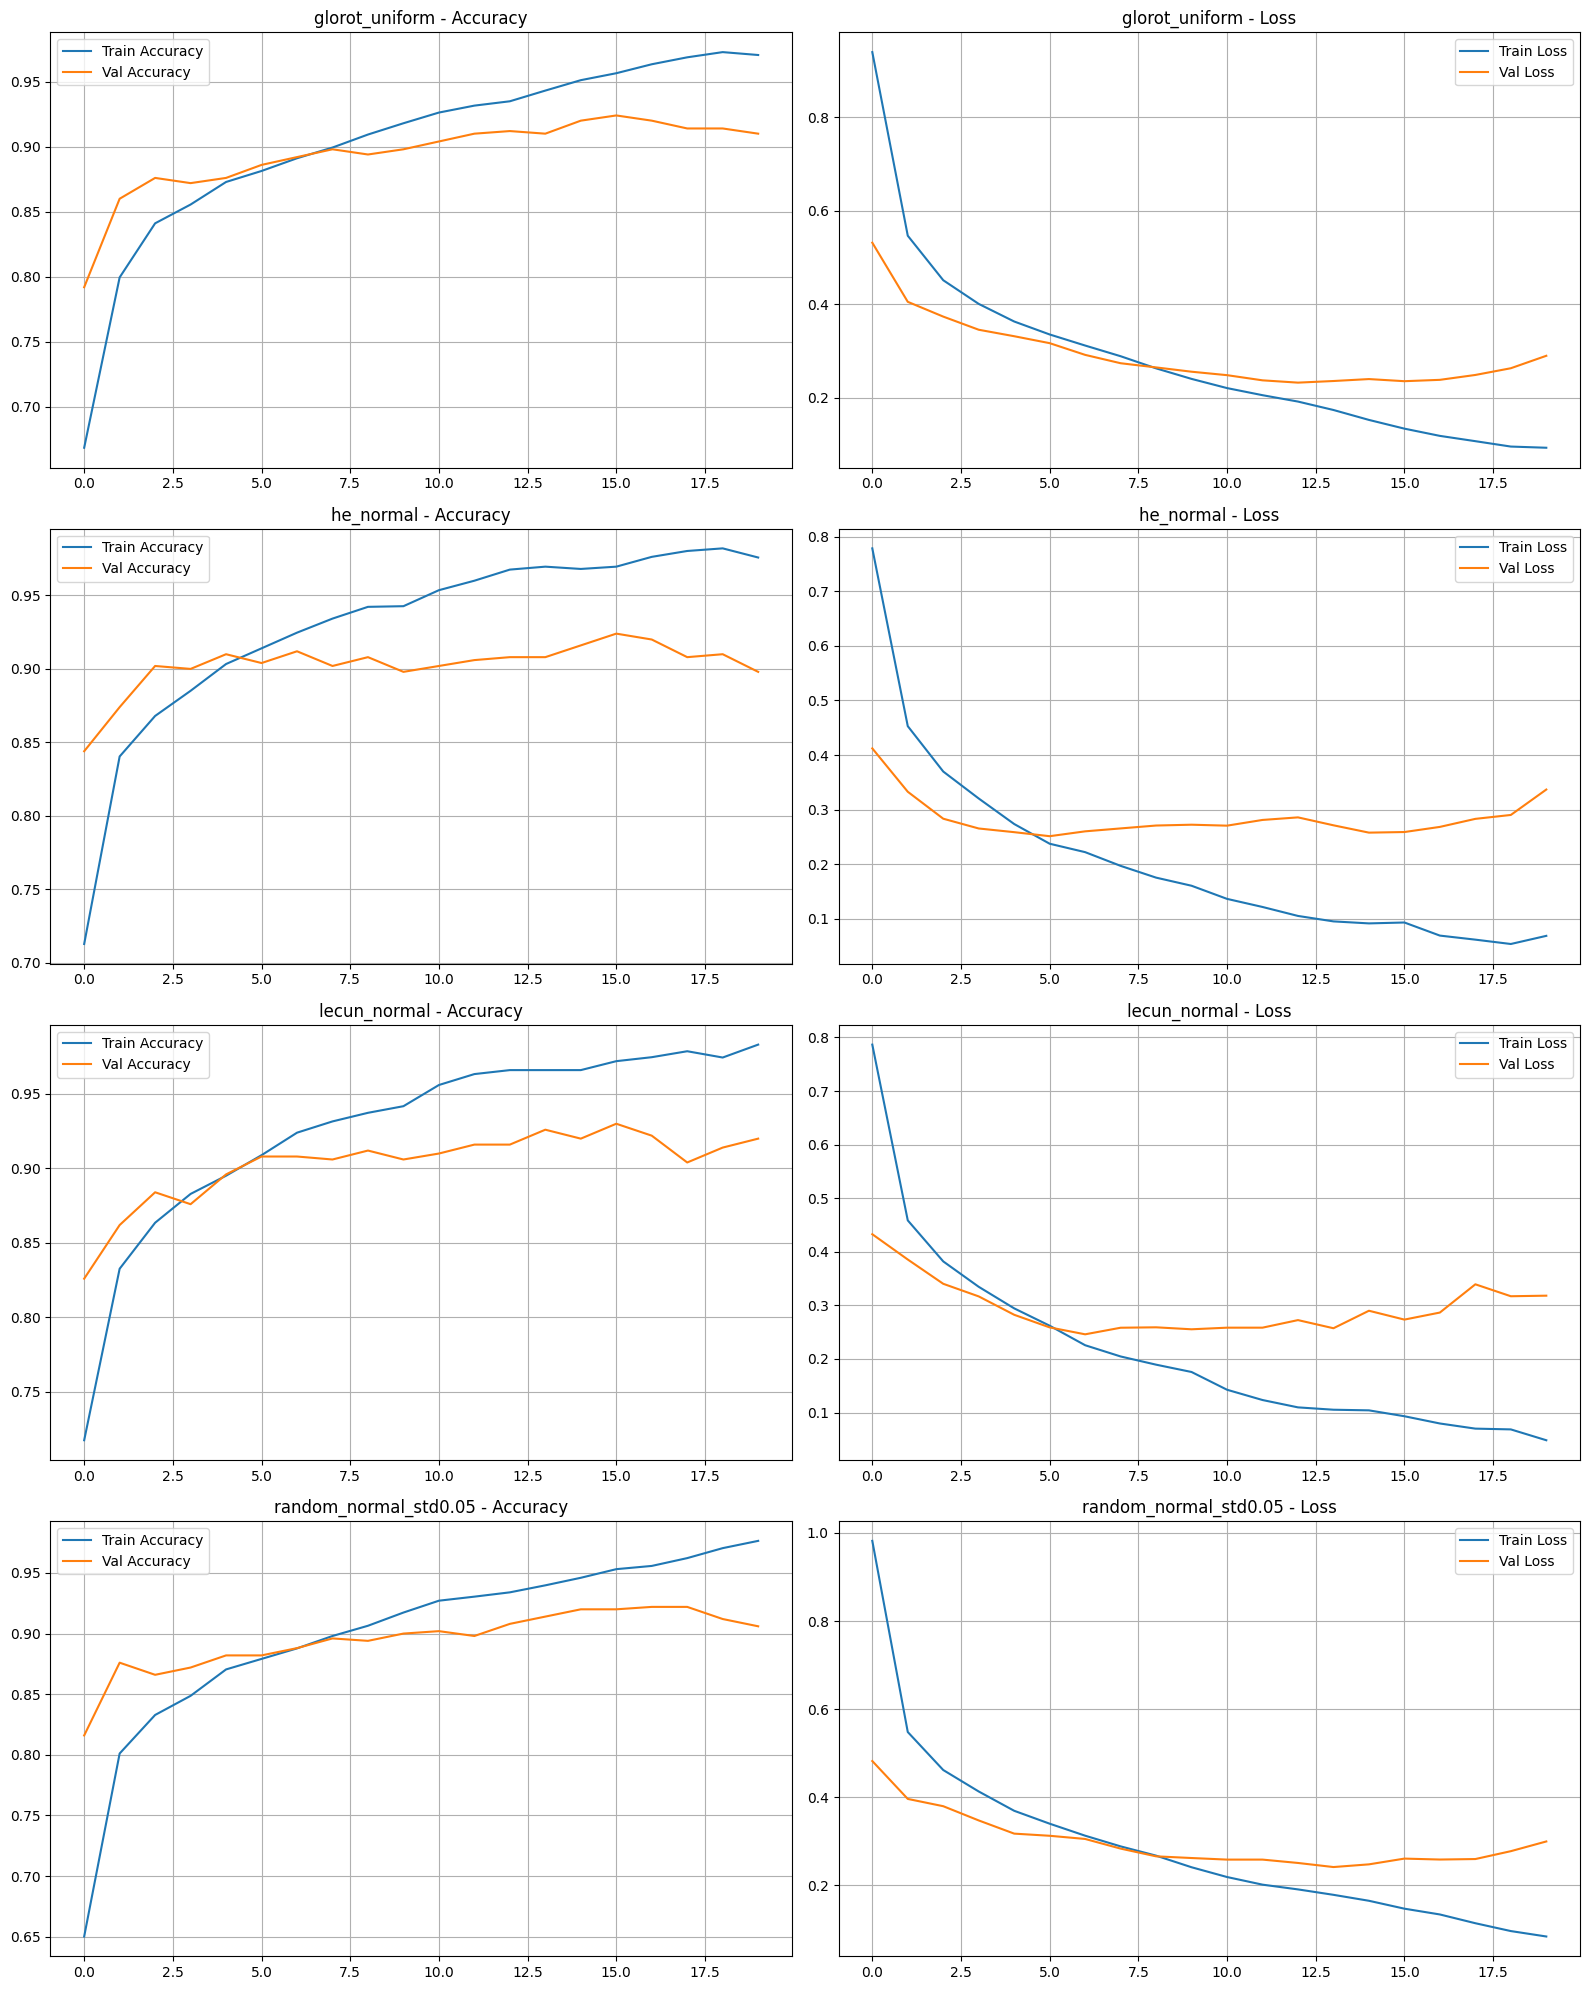

In [7]:
# Plot training vs validation accuracy and loss side-by-side for each initializer
fig, axs = plt.subplots(4, 2, figsize=(16, 20))

for idx, (name, history) in enumerate(histories.items()):
    # Accuracy
    axs[idx, 0].plot(history.history['accuracy'], label="Train Accuracy")
    axs[idx, 0].plot(history.history['val_accuracy'], label="Val Accuracy")
    axs[idx, 0].set_title(f"{name} - Accuracy")
    axs[idx, 0].legend()
    axs[idx, 0].grid(True)

    # Loss
    axs[idx, 1].plot(history.history['loss'], label="Train Loss")
    axs[idx, 1].plot(history.history['val_loss'], label="Val Loss")
    axs[idx, 1].set_title(f"{name} - Loss")
    axs[idx, 1].legend()
    axs[idx, 1].grid(True)

plt.tight_layout()
plt.show()


In [8]:
# Print final validation accuracy
print("Final Validation Accuracies:")
for name, history in histories.items():
    print(f"{name}: {history.history['val_accuracy'][-1]:.4f}")


Final Validation Accuracies:
glorot_uniform: 0.9100
he_normal: 0.8980
lecun_normal: 0.9200
random_normal_std0.05: 0.9060
